**INSTALLING APYORI LIBRARY**

In [223]:
pip install apyori

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


**IMPORTING LIBRARY**


In [224]:
from apyori import apriori
import pandas as pd

**READING THE DATASET**

In [225]:
data = pd.read_csv('Season1.csv')

**Convert the 'Items' column into a list of items**

In [226]:
data['Product'] = data['Product'].apply(lambda x: [item.strip() for item in x.split(',')])

**DISPLAYING THE TOTAL DATASET**

In [227]:
data

,Date,Product,Customer_Category
0,01/01/2023,"[['Body wash', 'Orange', 'Laundry Detergent', ...",Middle-Aged
1,01/01/2023,"[['Paper Towel For Faces', 'Yogurt', 'Pasta', ...",Senior Citizen
2,01/01/2023,"[['Yogurt', 'Tomatoes', 'Curd', 'Juices', 'Chi...",Homemaker
3,01/01/2023,"[['Black pepper', 'Cereal Bars']]",Senior Citizen
4,01/01/2023,"[['Black pepper', 'Cereal', 'Tomatoes', 'Dhal']]",Homemaker
...,...,...,...
7586,31/03/2023,"[['Semiya', 'Paper Towel For Faces', 'Jam', 'B...",Young Adult
7587,31/03/2023,"[['Shaving Cream', 'Saftey Razor Blade', 'Pape...",Middle-Aged
7588,31/03/2023,"[['Toothpaste', 'Tongue Cleaner']]",Teenager
7589,31/03/2023,[['Stationery']],Teenager


**Information of the data**

In [228]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date               7590 non-null   object
 1   Product            7591 non-null   object
 2   Customer_Category  7591 non-null   object
dtypes: object(3)
memory usage: 178.0+ KB


**Data Preprocessing**

**shape of the Data**

In [229]:
data.shape

(7591, 3)

**checking Null values**

In [230]:
data.isnull().sum()

Date                 1
Product              0
Customer_Category    0
dtype: int64

**DATA VISULAIZATION OF THE CUSTOMER_CATEGORY**

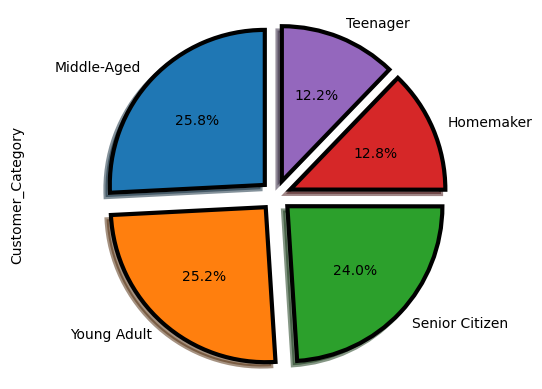

In [231]:
import matplotlib.pyplot as plt
data['Customer_Category'].value_counts().plot(kind='pie', explode=(0.1, 0.1, 0.1, 0.1, 0.1), autopct='%1.1f%%', shadow=True, startangle=90, wedgeprops={"edgecolor":'black',"linewidth":3,"antialiased": True})
plt.axis('equal')
plt.show()

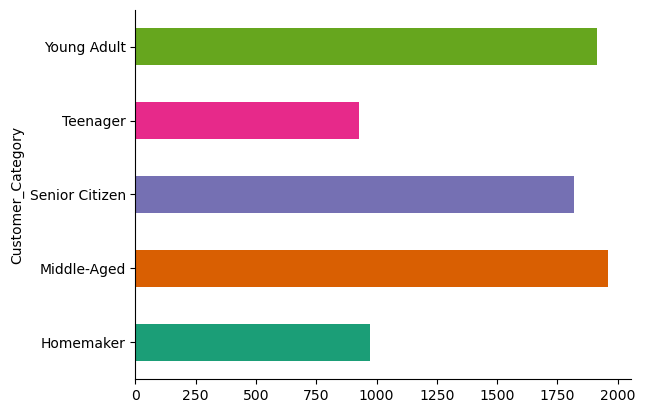

In [232]:
from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Customer_Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

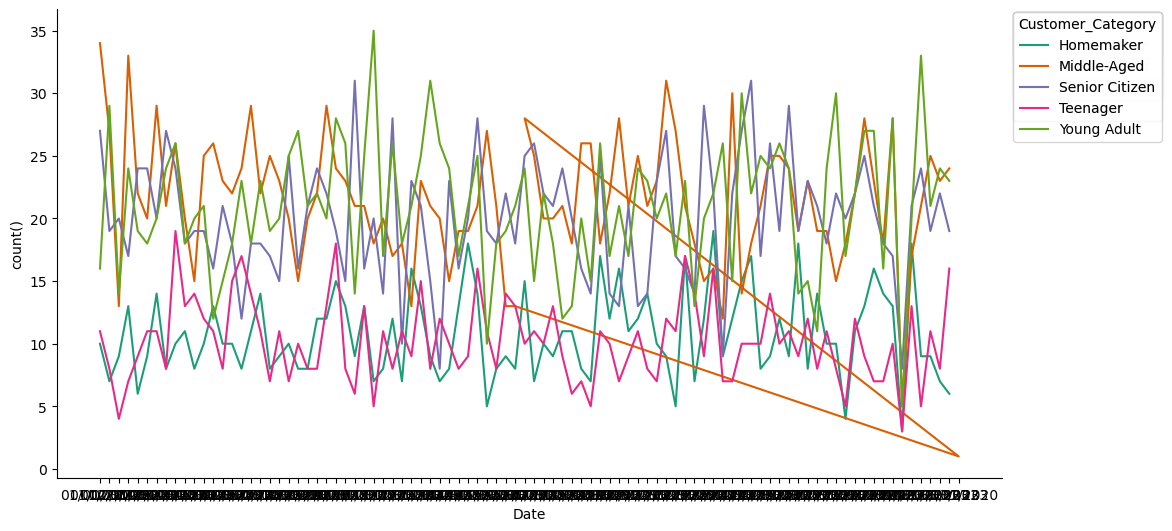

In [233]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Customer_Category')):
  _plot_series(series, series_name, i)
  fig.legend(title='Customer_Category', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

**Convert DataFrame to a list of lists (required format for apyori)**

In [234]:
transactions = data['Product'].tolist()

# DISPLAYING THE TRANSACTION

In [235]:
transactions

[["['Body wash'", "'Orange'", "'Laundry Detergent'", "'Kambu Rice'", "'Mop']"],
 ["['Paper Towel For Faces'",
  "'Yogurt'",
  "'Pasta'",
  "'Jam'",
  "'Bread'",
  "'Soda']"],
 ["['Yogurt'", "'Tomatoes'", "'Curd'", "'Juices'", "'Chips']"],
 ["['Black pepper'", "'Cereal Bars']"],
 ["['Black pepper'", "'Cereal'", "'Tomatoes'", "'Dhal']"],
 ["['Apple'", "'Soap'", "'Dhal'", "'Spinach']"],
 ["['Baby Wipes'", "'Insect Repellent'", "'Vinegar']"],
 ["['Chocolate'", "'Sugar']"],
 ["['Cereal Bars'", "'Mop'", "'Laundry Detergent'", "'Cereal']"],
 ["['Kambu Rice'", "'Coconut oil'", "'Coffee'", "'Biscuit']"],
 ["['Shampoo'", "'Sugar'", "'Soda'", "'Mustard']"],
 ["['Body wash'", "'Onions'", ']'],
 ["['Saftey Razor Blade'", "'Ketchup']"],
 ["['Yogurt'", "'Ice Cream'", "'Deodorant']"],
 ["['Shower Gel']"],
 ["['Milk'", "'Cereal']"],
 ["['Hair Gel'", "'Hand Sanitizer'", "'Cereal Bars']"],
 ["['Hand Sanitizer']"],
 ["['Cereal Bars'", "'Chocolate'", "'Tissues'", "'Pickles']"],
 ["['Potatoes'", "'Dishwash 

**Perform association rule mining using Apriori algorithm**

In [236]:
results = list(apriori(transactions, min_support=0.01, min_confidence=0.7))

**RESULTS**

In [237]:
for rule in results:
    print(rule)

RelationRecord(items=frozenset({"'Biscuit'", "['Coffee'"}), support=0.010538795942563562, ordered_statistics=[OrderedStatistic(items_base=frozenset({"['Coffee'"}), items_add=frozenset({"'Biscuit'"}), confidence=0.8791208791208791, lift=20.407971233659307)])
RelationRecord(items=frozenset({"'Chips'", "['Juices'"}), support=0.010934000790409695, ordered_statistics=[OrderedStatistic(items_base=frozenset({"['Juices'"}), items_add=frozenset({"'Chips'"}), confidence=0.8217821782178217, lift=18.293690659388517)])
RelationRecord(items=frozenset({"'Vegetables' ]", "'Dhal'"}), support=0.02595178500856277, ordered_statistics=[OrderedStatistic(items_base=frozenset({"'Vegetables' ]"}), items_add=frozenset({"'Dhal'"}), confidence=1.0, lift=22.131195335276967)])
RelationRecord(items=frozenset({"[ 'Rice'", "'Dhal'"}), support=0.014490844421024898, ordered_statistics=[OrderedStatistic(items_base=frozenset({"[ 'Rice'"}), items_add=frozenset({"'Dhal'"}), confidence=1.0, lift=22.131195335276967)])
Relatio

In [238]:
for Product in results:
    pair = Product[0]
    items = [x for x in pair]
    
    if len(items) > 2:
        print("Rule: " + items[0] + " -> " + items[1])
        print("Support: " + str(Product[1]))
        print("Confidence: " + str(Product[2][0][2]))
        
    else:
        print("Rule: " + items[0] + " -> " + items[1])
        print("Support: " + str(Product[1]))
        print("Confidence: " + str(Product[2][0][2]))
    
    # Calculate lift
    item1_count = sum(1 for transaction in transactions if items[0] in transaction)
    item2_count = sum(1 for transaction in transactions if items[1] in transaction)
    rule_count = sum(1 for transaction in transactions if all(item in transaction for item in items))
    
    total_transactions = len(transactions)
    item1_support = item1_count / total_transactions
    item2_support = item2_count / total_transactions
    rule_support = rule_count / total_transactions
    
    lift = rule_support / (item1_support * item2_support)
    print("Lift: " + str(lift))
    print("=====================================")

Rule: 'Biscuit' -> ['Coffee'
Support: 0.010538795942563562
Confidence: 0.8791208791208791
Lift: 20.407971233659307
Rule: 'Chips' -> ['Juices'
Support: 0.010934000790409695
Confidence: 0.8217821782178217
Lift: 18.29369065938852
Rule: 'Vegetables' ] -> 'Dhal'
Support: 0.02595178500856277
Confidence: 1.0
Lift: 22.131195335276967
Rule: [ 'Rice' -> 'Dhal'
Support: 0.014490844421024898
Confidence: 1.0
Lift: 22.13119533527697
Rule: 'Feminine Hygiene Products' -> 'Paper Towel for Faces']
Support: 0.010934000790409695
Confidence: 0.8645833333333333
Lift: 37.50315476190477
Rule: [ 'Rice' -> 'Spices'
Support: 0.011592675536819919
Confidence: 0.8
Lift: 15.732642487046633
Rule: ['Rice' -> 'Spices'
Support: 0.010143591094717429
Confidence: 0.7777777777777778
Lift: 15.295624640184226
Rule: ['Toothpaste' -> 'Tongue Cleaner'
Support: 0.017915953102358054
Confidence: 0.8192771084337349
Lift: 17.275368139223563
Rule: 'Tongue Cleaner'] -> 'Toothpaste'
Support: 0.020023712290870768
Confidence: 0.8351648351

# FIND THE LOW SUPPORT IN THE DATASET


In [239]:
results = list(apriori(transactions, min_support=0.001))
results

[RelationRecord(items=frozenset({''}), support=0.013173494928204453, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({''}), confidence=0.013173494928204453, lift=1.0)]),
 RelationRecord(items=frozenset({"'Air Freshener'"}), support=0.01106573573969174, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({"'Air Freshener'"}), confidence=0.01106573573969174, lift=1.0)]),
 RelationRecord(items=frozenset({"'Air Freshener']"}), support=0.008826241601896984, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({"'Air Freshener']"}), confidence=0.008826241601896984, lift=1.0)]),
 RelationRecord(items=frozenset({"'Apple'"}), support=0.016730338558819655, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({"'Apple'"}), confidence=0.016730338558819655, lift=1.0)]),
 RelationRecord(items=frozenset({"'Apple']"}), support=0.009484916348307205, ordered_statistics=[OrderedStatistic(

# FINDING THE HIGH SUPPORT IN THE DATASET

In [240]:
results = list(apriori(transactions, min_support=0.044))
results

[RelationRecord(items=frozenset({"'Chips'"}), support=0.044921617705177184, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({"'Chips'"}), confidence=0.044921617705177184, lift=1.0)]),
 RelationRecord(items=frozenset({"'Dhal'"}), support=0.04518508760374127, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({"'Dhal'"}), confidence=0.04518508760374127, lift=1.0)]),
 RelationRecord(items=frozenset({"'Spices'"}), support=0.05084969042286919, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({"'Spices'"}), confidence=0.05084969042286919, lift=1.0)]),
 RelationRecord(items=frozenset({"'Tongue Cleaner'"}), support=0.04742458174153603, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({"'Tongue Cleaner'"}), confidence=0.04742458174153603, lift=1.0)]),
 RelationRecord(items=frozenset({"'Toothpaste'"}), support=0.04861019628507443, ordered_statistics=[OrderedStatistic(ite

# TO FIND THE DHAL (MAXIMUM-CONFIDENT LEVEL) IN THE DATASET

In [ ]:
dataset=[Sure, here's the same list with commas added between the items:

['Black pepper', 'Cereal', 'Tomatoes', 'Dhal'],  
['Apple', 'Soap', 'Dhal', 'Spinach'],  
['Bread', 'Cooking Oil', 'Dhal', 'Eggs'],  
['Dhal', 'Insect Repellent', 'Light Bulbs'],  
['Diapers', 'Laundry Detergent', 'Dhal', 'Carrots', 'Milk', 'Toothbrush'],  
['Cooking Oil', 'Air Freshener', 'Dish Soap', 'Stationery', 'Dhal'],  
['Rice', 'Spices', 'Dhal', 'Vegetables'],  
['Rice', 'Spices', 'Dhal', 'Vegetables'],  
['Rice', 'Spices', 'Dhal', 'Vegetables'],  
['Rice', 'Spices', 'Dhal', 'Vegetables'],  
['Dhal', 'Milk', 'Banana', 'Kambu Rice'],  
['Dhal', 'Orange', 'Dustpan'],  
['Semiya', 'Dhal'],  
['Dhal', 'Ketchup', 'Semiya', 'Spices'],  
['Dhal', 'Spinach'],  
['Spinach', 'Dhal', 'Spices'],  
['Dhal', 'Deodorant', 'Mustard'],  
['Wheat Flour', 'Dhal', 'Vegetables'],  
['Power Strips', 'Cooking Oil', 'Dhal'],  
['Cooking Oil', 'Spices', 'Semiya', 'Dhal'],  
['Rice', 'Spices', 'Dhal', 'Vegetables'],  
['Eggs', 'Vegetables', 'Dhal'],  
['Orange', 'Eggs', 'Dhal', 'Vegetables', 'Olive Oil', 'Cereal Bars', 'Cleaning Spray'],  
['Ragi Malt', 'Honey', 'Dhal', 'Cereal Bars'],  
['Dhal', 'Vegetables'],  
['Honey', 'Milk', 'Eggs', 'Dhal', 'Vegetables'],  
['Coconut oil', 'Dhal', 'Vegetables'],  
['Rice', 'Spices', 'Dhal', 'Vegetables'],  
['Rice', 'Spices', 'Dhal', 'Vegetables'],  
['Dhal', 'Coconut oil', 'Sugar'],  
['Rice', 'Dhal', 'Vegetables'],  
['Cereal', 'Dhal'],  
['Eggs', 'Dhal', 'Vegetables', 'Spices'],  
['Spinach', 'Dhal', 'Vegetables'],  
['Wheat Flour', 'Dhal', 'Vegetables'],  
['Egg', 'Dhal', 'Vegetables'],  
['Rice', 'Spices', 'Dhal', 'Vegetables'],  
['Potatoes', 'Dhal', 'Vegetables', 'Eggs', 'Diapers', 'Chocolate', 'Banana'],  
['Baby Wipes', 'Kambu Rice', 'Potatoes', 'Dhal', 'Insect Repellent'],  
['Dhal', 'Air Freshener', 'Hair Gel'],  
['Honey', 'Dhal', 'Vegetables'],  
['Wheat Flour', 'Dhal', 'Vegetables'],  
['Cleaning Spray', 'Tea', 'Biscuit', 'Yogurt', 'Dhal', 'Trash Bags'],  
['Soap', 'Plant Fertilizer', 'Dhal'],  
['Feminine Hygiene Products', 'Paper Towel for Faces', 'Coconut oil', 'Dhal', 'Paper Towel For Faces'],  
['Coconut oil', 'Dhal', 'Vegetables'],  
['Tomatoes', 'paneer', 'Dhal', 'Vegetables'],  
['Dhal', 'Tea', 'Biscuit'],  
['Rice', 'Spices', 'Dhal', 'Vegetables'],  
['Dhal', 'Olive Oil', 'Ice Cream', 'Banana'],  
['Shaving Cream', 'Dhal', 'Toilet Freshner', 'Plant Fertilizer'],  
['Vinegar', 'Dhal', 'Vegetables', 'Eggs'],  
['Dhal', 'Vegetables', 'Spinach', 'Cleaner'],  
['Rice', 'Spices', 'Dhal', 'Vegetables'],  
['Diapers', 'Black pepper', 'paneer', 'Dhal', 'Vegetables'],  
['Soda', 'Deodorant', 'Dhal', 'Ketchup', 'Hair Gel'],  
['Black pepper', 'paneer', 'Dhal', 'Vegetables'],  
['Dhal', 'Vegetables'],  
['Rice', 'Dhal', 'Vegetables'],  
['Rice', 'Spices', 'Dhal', 'Vegetables'],  
['Tissues', 'Body wash', 'Plant Fertilizer', 'Dhal'],  
['Feminine Hygiene Products', 'Paper Towel for Faces', 'Dhal'],  
['Wheat Flour', 'Dhal', 'Vegetables'],  
['Cereal', 'Dish Soap', 'Dhal', 'Toilet Freshner', 'Cheese'],  
['Dhal', 'Vegetables'],  
['Dhal', 'Eggs', 'Onions'],  
['Rice', 'Dhal', 'Vegetables'],  
['Cereal', 'Toothbrush', 'Dhal', 'Deodorant'],  
['Rice', 'Spices', 'Dhal', 'Vegetables'],  
['Apple', 'Onions', 'Dhal', 'Vegetables', 'Paper Towel For Faces'],  
['Dhal', 'Vegetables'],  
['Saftey Razor Blade', 'Olive Oil', 'Black pepper', 'Dhal', 'Vegetables', 'Spices'],  
['Plant Fertilizer', 'Pasta', 'Vinegar', 'Toothpaste', 'Tongue Cleaner', 'Dhal'],  
['Rice', 'Spices', 'Dhal', 'Vegetables'],  
['Dhal', 'Vegetables'],  
['Wheat Flour', 'Laundry Detergent', 'Semiya', 'Dhal', 'Cereal'],  
['Dhal', 'Vegetables', 'Onions', 'Soap'],  
['Dish Soap', 'Paper Towel For Faces', 'Cleaner', 'Dhal', 'Rice', 'Spices'],  
['Dhal', 'Rice'],  
['Juices', 'Chips', 'Dhal', 'Vegetables'],  
['Nuts', 'Semiya', 'Dhal', 'Vegetables'],  
['Dhal', 'Toothpaste', 'Tongue Cleaner', 'Apple'],  
['Honey', 'Rice', 'Spices', 'Semiya', 'Pickles', 'Dhal'],  
['Rice', 'Dhal', 'Vegetables'],  
['Rice', 'Sp

ices', 'Dhal', 'Vegetables'],  
['Nuts', 'Dhal', 'Vegetables'],  
['Dhal', 'Yogurt'],  
['Rice', 'Dhal', 'Vegetables'],  
['Cereal', 'Dhal', 'Vegetables'],  
['Toothpaste', 'Tongue Cleaner', 'Dhal', 'Juices', 'Chips', 'Saftey Razor Blade'],  
['Milk', 'Dhal', 'Vegetables'],  
['Black pepper', 'Dhal', 'Vegetables'],  
['Wheat Flour', 'Dhal', 'Vegetables'],  
['Dhal', 'Yogurt'],  
['Wheat Flour', 'Dhal', 'Vegetables'],  
['Laundry Detergent', 'Tea', 'Biscuit', 'Apple', 'Dhal'],  
['Power Strips', 'Soda', 'Eggs', 'Dhal', 'Vegetables'],  
['Wheat Flour', 'Dhal', 'Vegetables'],  
['Olive Oil', 'Air Freshener', 'Dhal'],
Sure, here's the list with commas added between the items:

['Wheat Rava', 'Dhal', 'Vegetables'],  
['Dustpan', 'Potatoes', 'Dhal'],  
['Milk', 'Dhal', 'Vegetables'],  
['Dhal', 'Spinach', 'Yogurt'],  
['Egg', 'Dhal', 'Vegetables'],  
['Broom', 'Dhal', 'Vegetables'],  
['Deodorant', 'Dhal', 'Broom', 'Spices'],  
['Toothbrush', 'Dhal', 'Air Freshener', 'Onions'],  
['Wheat Flour', 'Dhal', 'Vegetables'],  
['Rice', 'Spices', 'Dhal', 'Vegetables'],  
['Power Strips', 'Soap', 'Toothbrush', 'Vinegar', 'Dhal'],  
['Coconut oil', 'Dhal', 'Vegetables'],  
['Vinegar', 'Dhal', 'Banana', 'Onions'],  
['Egg', 'Dhal', 'Vegetables'],  
['Coconut oil', 'Dhal', 'Vegetables'],  
['Rice', 'Spices', 'Dhal', 'Vegetables'],  
['Hair Gel', 'Dhal'],  
['Rice', 'Spices', 'Dhal', 'Vegetables'],  
['Olive Oil', 'Wheat Flour', 'Dhal'],  
['Semiya', 'Dhal', 'Vegetables'],  
['Rice', 'Spices', 'Dhal', 'Vegetables'],  
['Rice', 'Dhal', 'Vegetables'],  
['Rice', 'Dhal', 'Vegetables'],  
['Ketchup', 'Dhal', 'Black pepper', 'Air Freshener'],  
['Ragi Malt', 'Wheat Rava', 'Cleaning Spray', 'Banana', 'Dhal'],  
['Chips', 'Deodorant', 'Dhal'],  
['Carrots', 'Dhal'],  
['Wheat Flour', 'Dhal', 'Vegetables'],  
['Kambu Rice', 'Dhal'],  
['Semiya', 'Dhal'],  
['Rice', 'Spices', 'Dhal', 'Vegetables'],  
['Deodorant', 'Semiya', 'Dhal', 'Vegetables'],  
['Wheat Flour', 'Dhal', 'Vegetables'],  
['Dish Soap', 'Dhal', 'Vegetables'],  
['Dhal', 'Shower Gel'],  
['Mustard', 'Dhal', 'Vegetables'],  
['Dhal', 'Vegetables'],  
['Dhal', 'Cheese', 'Body wash', 'Milk'],  
['Dhal', 'Air Freshener', 'Wheat Flour', 'Cereal', 'Chips'],  
['Ketchup', 'Dhal', 'Vegetables', 'Eggs'],  
['Tissues', 'Dhal', 'Vegetables'],  
['Toothpaste', 'Tongue Cleaner', 'Stationery', 'Chocolate', 'Saftey Razor Blade', 'Dhal'],  
['Rice', 'Spices', 'Dhal', 'Vegetables'],  
['Potatoes', 'Cheese', 'Dhal'],  
['Dhal', 'Peanut Butter', 'Toilet Freshner', 'Stationery', 'Power Strips'],  
['Wheat Flour', 'Dhal', 'Vegetables'],  
['Yogurt', 'Chocolate', 'Shower Gel', 'Deodorant', 'Dhal'],  
['Diapers', 'Nuts', 'Dhal', 'Vegetables'],  
['Rice', 'Dhal', 'Vegetables'],  
['Egg', 'Dhal', 'Vegetables'],  
['Dish Soap', 'Dhal', 'Deodorant'],  
['Mustard', 'Dhal', 'Vegetables'],  
['Mustard', 'Dhal', 'Mustard', 'Cheese'],  
['Dhal', 'Juices', 'Chips'],  
['Dhal', 'Vinegar', 'Trash Bags'],  
['Rice', 'Spices', 'Dhal', 'Vegetables'],  
['Dhal', 'Insect Repellent', 'Cereal Bars'],  
['Wheat Flour', 'Dhal', 'Vegetables'],  
['Coconut oil', 'Dhal', 'Vegetables'],  
['Coconut oil', 'Dhal', 'Vegetables'],  
['Dhal', 'Cereal', 'Light Bulbs', 'Toothpaste', 'Tongue Cleaner'],  
['Rice', 'Spices', 'Dhal', 'Vegetables'],  
['Vegetables', 'Honey', 'Dhal'],  
['Rice', 'Dhal', 'Vegetables'],  
['Rice', 'Spices', 'Dhal', 'Vegetables'],  
['Wheat Flour', 'Dhal', 'Vegetables'],  
['Dhal', 'Pasta', 'Shampoo', 'Rice', 'Spices', 'Spices'],  
['Egg', 'Dhal', 'Vegetables'],  
['Dhal', 'Deodorant', 'Carrots', 'Honey'],  
['Egg', 'Dhal', 'Vegetables'],  
['Stationery', 'Dhal'],  
['Rice', 'Spices', 'Dhal', 'Vegetables'],  
['Ice Cream', 'Dhal', 'Saftey Razor Blade', 'Toothpaste', 'Tongue Cleaner'],  
['Rice', 'Spices', 'Dhal', 'Vegetables'],  
['Toilet Freshner', 'Tea', 'Biscuit', 'Ketchup', 'Dhal', 'Apple'],  
['Baby Wipes', 'Eggs', 'Spinach', 'Dhal'],  
['Dhal', 'Ice Cream'],  
['Coconut oil', 'Dhal', 'Vegetables'],  
['Wheat Flour', 'Dhal', 'Vegetables'],  
['Egg', 'Dhal', 'Vegetables'],  
['Orange', 'Chocolate', 'Dhal', 'Hair Gel', 'Coconut oil'],  
['Dhal', 'Juices', 'Chips', 'Toothpaste', 'Tongue Cleaner'],  
['Coconut oil', 'Dhal', 'Vegetables'],  
['Rice', 'Spices', 'Dhal', 'Vegetables'],  
['Rice', 'Spices', 'Dhal', 'Vegetables'],  
['Sugar', 'Feminine Hygiene Products', 'Paper Towel for Faces', 'Dhal', 'Insect Repellent'],  
['Stationery', 'Air Freshener', 'Tissues', 'Dhal'],  
['Rice', 'Spices', 'Dhal', 'Vegetables'],  
['Trash Bags', 'Ragi Malt', 'Chips', 'Dhal'],  
['Egg', 'Dhal', 'Vegetables'],  
['Ragi Malt', 'Coconut oil', 'Feminine Hygiene

 Products', 'Paper Towel for Faces', 'Deodorant', 'Dhal'],  
['Juices', 'Chips', 'Dustpan', 'Dhal', 'Cleaning Spray'],  
['Coconut oil', 'Dhal', 'Vegetables'],  
['Rice', 'Spices', 'Dhal', 'Vegetables'],  
['Egg', 'Dhal', 'Vegetables'],  
['Dish Soap', 'Dhal', 'Deodorant'],  
['Mustard', 'Dhal', 'Vegetables'],  
['Mustard', 'Dhal', 'Mustard', 'Cheese'],  
['Dhal', 'Juices', 'Chips'],  
['Dhal', 'Vinegar', 'Trash Bags'],  
['Rice', 'Spices', 'Dhal', 'Vegetables'],  
['Dhal', 'Insect Repellent', 'Cereal Bars'],  
['Wheat Flour', 'Dhal', 'Vegetables'],  
['Coconut oil', 'Dhal', 'Vegetables'],  
['Coconut oil', 'Dhal', 'Vegetables'],  
['Dhal', 'Cereal', 'Light Bulbs', 'Toothpaste', 'Tongue Cleaner'],  
['Rice', 'Spices', 'Dhal', 'Vegetables'],  
['Apple', 'Broom', 'Dhal'],
Here's the list with commas added between the items:

['Egg', 'Dhal', 'Vegetables'],  
['Dhal', 'Ketchup'],  
['Dhal', 'Chips'],  
['Rice', 'Dhal', 'Vegetables'],  
['Feminine Hygiene Products', 'Paper Towel for Faces', 'Shaving Cream', 'Dhal'],  
['Rice', 'Spices', 'Dhal', 'Vegetables'],  
['Milk', 'Eggs', 'Dhal', 'Juices', 'Chips'],  
['Rice', 'Spices', 'Dhal', 'Vegetables'],  
['Rice', 'Spices', 'Dhal', 'Vegetables'],  
['Power Strips', 'Dhal', 'Deodorant', 'Deodorant', 'Shaving Cream'],  
['Rice', 'Dhal', 'Vegetables'],  
['Shampoo', 'Chocolate', 'Feminine Hygiene Products', 'Paper Towel for Faces', 'Dhal', 'Stationery'],  
['Banana', 'Dhal', 'Shower Gel'],  
['Banana', 'Dhal'],  
['Dhal', 'Bread', 'Kambu Rice', 'Juices', 'Chips'],  
['Coffee', 'Biscuit', 'Potatoes', 'Dhal', 'Dish Soap'],  
['Chips', 'Bread', 'Dhal'],  
['Toothpaste', 'Tongue Cleaner', 'Dhal', 'Spinach'],  
['Egg', 'Dhal', 'Vegetables'],  
['Wheat Flour', 'Dhal', 'Bread'],  
['Apple', 'Dhal'],  
['Egg', 'Dhal', 'Vegetables'],  
['Juices', 'Chips', 'Dhal', 'Insect Repellent', 'Toothpaste', 'Tongue Cleaner', 'Sugar'],  
['Vegetables', 'Dhal'],  
['Potatoes', 'Broom', 'Pasta', 'Dhal'],  
['Wheat Flour', 'Dhal', 'Vegetables'],  
['Carrots', 'Dhal'],  
['Dhal', 'Vegetables', 'Air Freshener', 'Toothpaste', 'Tongue Cleaner'],  
['Coffee', 'Biscuit', 'Shampoo', 'Diapers', 'Dhal', 'Shower Gel'],  
['Cheese', 'Dhal'],  
['Rice', 'Spices', 'Dhal', 'Vegetables'],  
['Carrots', 'Saftey Razor Blade', 'Dhal'],  
['Potatoes', 'Shower Gel', 'Dhal'],  
['Rice', 'Spices', 'Dhal', 'Vegetables'],  
['Rice', 'Spices', 'Dhal', 'Vegetables'],  
['Vinegar', 'Apple', 'Carrots', 'Dhal', 'Diapers'],  
['Rice', 'Dhal', 'Vegetables'],  
['Dhal', 'Black pepper'],  
['Toilet Freshner', 'Wheat Rava', 'Vegetables', 'Broom', 'Dhal'],  
['Milk', 'Cheese', 'Dhal', 'Hair Gel'],  
['Coconut oil', 'Dhal', 'Vegetables'],  
['Toothbrush', 'Rice', 'Spices', 'Dhal', 'Milk'],  
['Rice', 'Spices', 'Dhal', 'Vegetables'],  
['Dhal', 'Pickles', 'Yogurt'],  
['Deodorant', 'Broom', 'Dhal'],  
['Soda', 'Dhal', 'Dhal'],  
['Rice', 'Spices', 'Dhal', 'Vegetables'],  
['Dhal', 'Potatoes', 'Spices', 'Peanut Butter'],  
['Wheat Flour', 'Dhal', 'Vegetables'],  
['Rice', 'Spices', 'Dhal', 'Vegetables'],  
['Dhal', 'Soap'],  
['Wheat Flour', 'Dhal', 'Vegetables'],  
['Trash Bags', 'Plant Fertilizer', 'Plant Fertilizer', 'Dhal', 'Eggs'],  
['Rice', 'Spices', 'Dhal', 'Vegetables'],  
['Olive Oil', 'Shaving Cream', 'Potatoes', 'Dhal', 'Peanut Butter'],  
['Yogurt', 'Toothbrush', 'Dhal', 'Air Freshener', 'Cleaner'],  
['Milk', 'Soda', 'Dhal', 'Cleaning Spray', 'Wheat Rava'],  
['Ice Cream', 'Hair Gel', 'Nuts', 'Ice Cream', 'Dhal'],  
['Rice', 'Spices', 'Dhal', 'Vegetables'],  
['Mop', 'Dhal', 'Jam', 'Bread', 'Semiya'],  
['Paper Towel For Faces', 'Dhal', 'Nuts', 'Cooking Oil', 'Rice', 'Spices'],  
['Banana', 'Shaving Cream', 'Kambu Rice', 'Dhal'],  
['Rice', 'Spices', 'Dhal', 'Vegetables'],  
['Egg', 'Dhal', 'Vegetables'],  
['Vinegar', 'Dhal', 'Cooking Oil', 'Sugar', 'Yogurt'],  
['Hair Gel', 'Saftey Razor Blade', 'Dhal'],  
['Kambu Rice', 'Dhal', 'Baby Wipes'],  
['Dhal', 'Baby Wipes', 'Toothpaste', 'Tongue Cleaner', 'Cereal', 'Toothpaste', 'Tongue Cleaner'],  
['Semiya', 'Eggs', 'Dhal', 'Saftey Razor Blade', 'Shower Gel'],  
['Vegetables', 'Dhal'],  
['Trash Bags', 'Soda', 'Dhal', 'Tissues', 'Baby Wipes'],  
['Rice', 'Spices', 'Dhal', 'Vegetables'],  
['Dish Soap', 'Tea', 'Biscuit', 'Dhal', 'Cleaner'],  
['Rice', 'Spices', 'Dhal', 'Vegetables'],  
['Rice', 'Spices', 'Dhal', 'Vegetables'],  
['Tissues', 'Dhal', 'Diapers', 'Power Strips'],  
['Trash Bags', 'Dhal', 'Vinegar', 'Ketchup'],  
['Soda', 'Chips', 'Dhal'],  
['Rice', 'Spices', 'Dhal', 'Vegetables'],  
['Dhal', 'Dish Soap', 'Soda', 'Cleaning Spray'],  
['Bread', 'Dhal', 'Saftey Razor Blade'],  
['Toilet Freshner', 'Dhal', 'Dhal', 'Pickles'],  
['Toothpaste', 'Tongue Cleaner', 'Honey', 'Dhal', 'Power Strips', 'Honey'],  
['Rice', 'Spices', 'Dhal', 'Vegetables'],  
['Orange', 'Juices', 'Chips', 'Plant Fertilizer', 'Dhal', 'Tomatoes'],  
['Wheat Flour', 'Dhal', 'Vegetables'],
Sure, here's the same list with commas added between the items:

['Coconut oil', 'Dhal', 'Vegetables'],
['Rice', 'Dhal', 'Vegetables'],
['Dhal', 'Spices', 'Shaving Cream', 'Tissues'],
['Sugar', 'Body wash', 'Nuts', 'Trash Bags', 'Dhal'],
['Dhal', 'Trash Bags', 'Ragi Malt', 'Soap', 'Ketchup'],
['Coconut oil', 'Dhal', 'Vegetables'],
['Egg', 'Dhal', 'Vegetables'],
['Diapers', 'Dhal'],
['Pasta', 'Spices', 'Tomatoes', 'Dhal'],
['Chocolate', 'Dhal', 'Dishwash scrubber'],
['Wheat Flour', 'Dhal', 'Vegetables'],
['Wheat Flour', 'Dhal', 'Vegetables'],
['Soda', 'Broom', 'Dhal'],
['Rice', 'Spices', 'Dhal', 'Vegetables'],
['Light Bulbs', 'Banana', 'Dhal', 'Carrots'],
['Rice', 'Spices', 'Dhal', 'Vegetables'],
['Dhal', 'Trash Bags'],
['Eggs', 'Dhal', 'Milk', 'Shower Gel', 'Tissues'],
['Dhal', 'Cooking Oil'],
['Dhal', 'Body wash', 'Body wash'],
['Ragi Malt', 'Paper Towel For Faces', 'Dhal'],
['Wheat Flour', 'Dhal', 'Vegetables'],
['Dhal', 'Tea', 'Biscuit', 'Carrots', 'Saftey Razor Blade'],
['Chocolate', 'Dhal', 'Dishwash scrubber', 'Broom'],
['Soda', 'Wheat Rava', 'Apple', 'Shampoo', 'Dhal'],
['Rice', 'Spices', 'Dhal', 'Vegetables'],
['Dhal', 'Dhal'],
['Dhal', 'Body wash', 'Body wash'],
['Ragi Malt', 'Banana', 'Dhal', 'Honey', 'Juices', 'Chips'],
['Rice', 'Spices', 'Dhal', 'Vegetables'],
['Rice', 'Spices', 'Dhal', 'Vegetables'],
['Cereal', 'Trash Bags', 'Peanut Butter', 'Dhal'],
['Wheat Flour', 'Onions', 'Dhal'],
['Dhal', 'Cooking Oil', 'Dish Soap'],
['Rice', 'Spices', 'Dhal', 'Vegetables'],
['Dhal', 'Dish Soap', 'Wheat Rava', 'Nuts', 'Onions'],
['Feminine Hygiene Products', 'Paper Towel for Faces', 'Dhal', 'Dustpan'],
['Rice', 'Spices', 'Dhal', 'Vegetables'],
['Apple', 'Cooking Oil', 'Nuts', 'Dhal', 'Potatoes'],
['Dhal', 'Milk'],
['Wheat Flour', 'Dhal', 'Vegetables'],
['Rice', 'Spices', 'Dhal', 'Vegetables'],
['Rice', 'Spices', 'Dhal', 'Vegetables'],
['Rice', 'Dhal', 'Vegetables'],
['Ragi Malt', 'Toilet Freshner', 'Dhal', 'Shaving Cream', 'Potatoes'],
['Wheat Flour', 'Dhal', 'Vegetables'],
['Egg', 'Dhal', 'Vegetables'],
['Rice', 'Spices', 'Dhal', 'Vegetables'],
['Rice', 'Spices', 'Dhal', 'Vegetables'],
['Peanut Butter', 'Dhal', 'Shaving Cream', 'Dish Soap', 'Dish Soap'],
['Rice', 'Spices', 'Dhal', 'Vegetables'],
['Dhal', 'Air Freshener', 'Baby Wipes', 'Black pepper'],
['Rice', 'Spices', 'Dhal', 'Vegetables'],
['Rice', 'Spices', 'Dhal', 'Vegetables'],
['Rice', 'Spices', 'Dhal', 'Vegetables'],
['Dhal', 'Dishwash scrubber'],
['Coffee', 'Biscuit', 'Dhal'],
['Dhal', 'Milk', 'Eggs', 'Diapers'],
['Wheat Flour', 'Dhal', 'Vegetables'],
['Rice', 'Spices', 'Dhal', 'Vegetables'],
['Dhal', 'Dhal', 'Coconut oil'],
['Carrots', 'Feminine Hygiene Products', 'Paper Towel for Faces', 'Dhal', 'Soap', 'Ketchup'],
['Cleaning Spray', 'Dhal', 'Vinegar', 'Toothpaste', 'Tongue Cleaner', 'Rice', 'Spices'],
['Cleaning Spray', 'Body wash', 'Dhal', 'Tissues'],
['Rice', 'Spices', 'Dhal', 'Vegetables'],
['Cereal Bars', 'Mustard', 'Dhal', 'Coconut oil'],
['Laundry Detergent', 'Dhal', 'Deodorant', 'Saftey Razor Blade'],
['Coconut oil', 'Dhal', 'Vegetables'],
['Paper Towel For Faces', 'Dhal', 'Power Strips', 'Eggs'],
['Cooking Oil', 'Dhal'],
['Rice', 'Spices', 'Dhal', 'Vegetables'],
['Rice', 'Spices', 'Dhal', 'Vegetables'],
['Rice', 'Spices', 'Dhal', 'Vegetables'],
['Plant Fertilizer', 'Dhal', 'Peanut Butter', 'Cooking Oil', 'Saftey Razor Blade'],
['Tissues', 'Sugar', 'Apple', 'Shower Gel', 'Dhal'],
['Rice', 'Spices', 'Dhal', 'Vegetables'],
['Peanut Butter', 'Potatoes', 'Vegetables', 'Dhal'],
['Dhal', 'Vegetables', 'Deodorant', 'Olive Oil'],
['Wheat Flour', 'Dhal', 'Vegetables'],
['Rice', 'Spices', 'Dhal', 'Vegetables'],
['Dhal', 'Paper Towel For Faces', 'Ice Cream'],
['Dhal', 'Tomatoes', 'Yogurt'],
['Diapers', 'Dhal', 'Shaving Cream', 'Tissues'],
['Juices', 'Chips', 'Dhal', 'Ragi Malt'],
['Dhal', 'Coffee', 'Biscuit', 'Pasta'],
['Wheat Flour', 'Dhal', 'Vegetables'],
['Dhal', 'Jam', 'Bread', 'Ice Cream'],
['Ketchup', 'Dhal', 'Spices', 'Semiya', 'Dhal'],
['Rice', 'Spices', 'Dhal', 'Vegetables'],
['Rice', 'Spices', 'Dhal', 'Vegetables'],
['Baby Wipes', 'Dhal', 'Chips'],


['Tomatoes', 'Shower Gel', 'Dhal', 'Broom', 'Pasta'],
['Egg', 'Dhal', 'Vegetables'],
['Dhal', 'Toothpaste', 'Tongue Cleaner', 'Olive Oil', 'Kambu Rice', 'Yogurt'],
['Soap', 'Dhal', 'Coconut oil'],
['Wheat Flour', 'Dhal', 'Vegetables'],
['Yogurt', 'Bread', 'Cleaning Spray', 'Dhal'],
['Wheat Flour', 'Dhal', 'Ice Cream', 'Tomatoes'],
['Rice', 'Spices', 'Dhal', 'Vegetables'],
['Coconut oil', 'Dhal', 'Vegetables'],
Certainly! Here's the list with commas added between the items:

['Rice', 'Dhal', 'Vegetables'],
['Wheat Flour', 'Dhal', 'Vegetables'],
['Milk', 'Carrots', 'Toothpaste', 'Tongue Cleaner', 'Dhal', 'Dustpan'],
['Shaving Cream', 'Cereal', 'Dhal', 'Coconut oil'],
['Wheat Flour', 'Dhal', 'Vegetables'],
['Rice', 'Dhal', 'Vegetables'],
['Coconut oil', 'Dhal', 'Vegetables'],
['Milk', 'Dhal', 'Air Freshener', 'Yogurt'],
['Wheat Flour', 'Dhal', 'Vegetables'],
['Rice', 'Spices', 'Dhal', 'Vegetables'],
['Rice', 'Spices', 'Dhal', 'Vegetables'],
['Rice', 'Spices', 'Dhal', 'Vegetables'],
['Wheat Flour', 'Dhal', 'Vegetables'],
['Deodorant', 'Deodorant', 'Dhal', 'Trash Bags'],
['Wheat Flour', 'Dhal', 'Vegetables'],
['Dishwash scrubber', 'Cheese', 'Dhal', 'Semiya'],
['Dhal', 'Deodorant', 'Light Bulbs', 'Tomatoes', 'Eggs'],
['Dhal', 'Sugar'],
['Rice', 'Spices', 'Dhal', 'Vegetables'],
['Dhal', 'Tomatoes', 'Laundry Detergent', 'Tomatoes', 'Milk'],
['Toothbrush', 'Vegetables', 'Dhal', 'Deodorant'],
['Dish Soap', 'Dhal', 'Olive Oil'],
['Dhal', 'Tomatoes', 'Soap', 'Shaving Cream'],
['Rice', 'Spices', 'Dhal', 'Vegetables'],
['Rice', 'Dhal', 'Vegetables'],
['Paper Towel For Faces', 'Hand Sanitizer', 'Deodorant', 'Dhal', 'Tomatoes'],
['Chips', 'Wheat Flour', 'Dhal'],
['Wheat Flour', 'Dhal', 'Vegetables'],
['Egg', 'Dhal', 'Vegetables'],
['Wheat Flour', 'Dhal', 'Vegetables'],
['Pickles', 'Milk', 'Dhal', 'Onions'],
['Saftey Razor Blade', 'Dhal'],
['Wheat Flour', 'Dhal', 'Vegetables'],
['Rice', 'Dhal', 'Vegetables'],
['Vinegar', 'Dhal', 'Toothpaste', 'Tongue Cleaner', 'Ketchup'],
['Wheat Flour', 'Dhal', 'Vegetables'],
['Yogurt', 'Chips', 'Baby Wipes', 'Saftey Razor Blade', 'Dhal'],
['Dhal', 'Cooking Oil', 'Jam', 'Bread', 'Chips'],
['Wheat Rava', 'Dhal', 'Coffee', 'Biscuit'],
['Coconut oil', 'Dhal', 'Vegetables'],
['Toothpaste', 'Tongue Cleaner', 'Dhal', 'Cleaning Spray', 'Black pepper', 'Olive Oil'],
['Dhal', 'Chips'],
['Air Freshener', 'Dhal', 'Tea', 'Biscuit', 'Paper Towel For Faces', 'Chocolate'],
['Rice', 'Spices', 'Dhal', 'Vegetables'],
['Air Freshener', 'Cheese', 'Dhal', 'Rice', 'Spices', 'Chocolate'],
['Dhal', 'Nuts', 'Dishwash scrubber'],
['Rice', 'Dhal', 'Vegetables'],
['Dhal', 'Olive Oil', 'Yogurt', 'Dishwash scrubber', 'Tissues'],
['Chocolate', 'Dhal', 'Insect Repellent'],
['Soap', 'Black pepper', 'Wheat Rava', 'Dhal'],
['Dhal', 'Soda', 'Olive Oil', 'Ice Cream', 'Juices', 'Chips'],
['Sugar', 'Dhal', 'Stationery', 'Chocolate'],
['Rice', 'Spices', 'Dhal', 'Vegetables'],
['Peanut Butter', 'Eggs', 'Vinegar', 'Dhal', 'Milk'],
['Rice', 'Spices', 'Dhal', 'Vegetables'],
['Egg', 'Dhal', 'Vegetables'],
['Rice', 'Dhal', 'Vegetables'],
['Eggs', 'Yogurt', 'Dhal', 'Dishwash scrubber'],
['Yogurt', 'Dhal', 'Toilet Freshner', 'Pickles'],
['Dhal', 'Orange', 'Carrots', 'Plant Fertilizer'],
['Chocolate', 'Dhal', 'Pasta', 'Honey', 'Black pepper'],
['Light Bulbs', 'Diapers', 'Dhal', 'Bread'],
['Coffee', 'Biscuit', 'Vinegar', 'Dhal', 'Dishwash scrubber', 'Ice Cream'],
['Wheat Flour', 'Dhal', 'Vegetables'],
['Dhal', 'Pasta'],
['Coconut oil', 'Dhal', 'Vegetables'],
['Peanut Butter', 'Paper Towel For Faces', 'Dish Soap', 'Dhal', 'Banana'],
['Body wash', 'Cereal Bars', 'Baby Wipes', 'Dhal', 'Ice Cream'],
['Rice', 'Dhal', 'Vegetables'],
['Egg', 'Dhal', 'Vegetables'],
['Rice', 'Spices', 'Dhal', 'Vegetables'],
['Wheat Flour', 'Dhal', 'Vegetables'],
['Vinegar', 'Cooking Oil', 'Dhal', 'Power Strips'],
['Dhal', 'Potatoes', 'Insect Repellent', 'Dhal'],
['Rice', 'Dhal', 'Vegetables'],
['Insect Repellent', 'Yogurt', 'Deodorant', 'Dhal'],
['Rice', 'Dhal', 'Vegetables'],
['Stationery', 'Wheat Flour', 'Dhal', 'Tomatoes', 'Broom'],
['Rice', 'Spices', 'Dhal', 'Vegetables'],
['Wheat Flour', 'Dhal', 'Vegetables'],
['Ice Cream', 'Dhal', 'Chocolate', 'Laundry Detergent'],
['Rice', 'Spices', 'Dhal', 'Vegetables'],
['Toothpaste', 'Tongue Cleaner', 'Feminine Hygiene Products', 'Paper Towel for Faces', 'Onions', 'Dhal'],
['Feminine Hygiene Products', 'Paper Towel for Faces', 'Toothpaste', 'Tongue Cleaner', 'Dhal'],
['Tissues', 'Banana', 'Saftey Razor Blade', 'Dhal'],
['Dhal', 'Pasta', 'Black pepper', 'Tea', 'Biscuit'],
['Juices', 'Chips', '

Cleaning Spray', 'Jam', 'Bread', 'Dhal'],
['Dhal', 'Chocolate'],
['Light Bulbs', 'Banana', 'Potatoes', 'Dhal'],
['Dhal', 'Bread', 'Wheat Flour'],
['Dhal', 'Potatoes', 'Shower Gel'],
['Ragi Malt', 'Pickles', 'Soda', 'Dhal', 'Chocolate'],
['Dhal', 'Pickles'],
['Wheat Flour', 'Dhal', 'Vegetables'],
['Olive Oil', 'Rice', 'Spices', 'Paper Towel For Faces', 'Dhal'],
['Saftey Razor Blade', 'Dhal'],
['Shower Gel', 'Dhal'],
['Bread', 'Dhal'],
['Dhal', 'Dhal'],
['Ketchup', 'Onions', 'Semiya', 'Jam', 'Bread', 'Dhal'],
Certainly! Here are the lists with commas added between the items:

['Dhal', 'Coffee', 'Biscuit'],
['Coconut oil', 'Dhal', 'Vegetables'],
['Dhal', 'Trash Bags', 'Trash Bags'],
['Coconut oil', 'Dhal', 'Vegetables'],
['Dhal', 'Orange', 'Tissues', 'Eggs', 'Cleaner'],
['Egg', 'Dhal', 'Vegetables'],
['Rice', 'Spices', 'Dhal', 'Vegetables'],
['Dhal', 'Wheat Flour', 'Shaving Cream', 'Vegetables'],
['Dhal', 'Feminine Hygiene Products', 'Paper Towel for Faces'],
['Rice', 'Spices', 'Dhal', 'Vegetables'],
['Wheat Flour', 'Dhal', 'Vegetables'],





]

In [241]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Sample dataset (list of lists representing transactions)
dataset = [['Yogurt', 'Tomatoes', 'Curd', 'Juices', 'Chips'],
           ['Potatoes', 'Dishwash scrubber', 'Chips'],
           ['Chips', 'Toothpaste', 'Tongue Cleaner', 'Feminine Hygiene Products', 'Paper Towel for Faces'],
           ['Juices', 'Chips'],
           ['Chips', 'Apple'],
           ['Toothpaste', 'Tongue Cleaner', 'Insect Repellent', 'Shampoo', 'Chips', 'Broom'],
           ['Saftey Razor Blade', 'Vegetables', 'Juices', 'Chips'],
           ['Paper Towel For Faces', 'Juices', 'Chips', 'Tissues', 'Deodorant'],
           ['Chips', 'Paper Towel For Faces'],
           ['Cleaning Spray', 'Chips', 'Semiya'],
           ['Trash Bags', 'Juices', 'Chips', 'Baby Wipes', 'Milk', 'Onions'],
           ['Ragi Malt', 'Pickles', 'Juices', 'Chips', 'Toothpaste', 'Tongue Cleaner'],
           ['Spinach', 'Chips', 'Shampoo', 'Cereal Bars', 'Jam', 'Bread'],
           ['Chips', 'Toothpaste', 'Tongue Cleaner', 'Power Strips', 'Juices', 'Chips'],
           ['Chips', 'Soap', 'Coffee', 'Biscuit'],
           ['Broom', 'Chips', 'Cleaning Spray', 'Soda'],
           ['Milk', 'Chips', 'Tomatoes', 'Deodorant'],
           ['Pickles', 'Hair Gel', 'Vinegar', 'Juices', 'Chips', 'Vegetables'],
           ['Wheat Flour', 'Juices', 'Chips', 'Ice Cream'],
           ['Juices', 'Chips', 'Feminine Hygiene Products', 'Paper Towel for Faces', 'Cereal', 'Spinach', 'Milk'],
           ['Chips'],
           ['Cleaner', 'Bread', 'Orange', 'Juices', 'Chips'],
           ['Juices', 'Chips'],
           ['Potatoes', 'Juices', 'Chips', 'Orange', 'Olive Oil'],
           ['Semiya', 'Cheese', 'Toothbrush', 'Juices', 'Chips'],
           ['Plant Fertilizer', 'Black pepper', 'Juices', 'Chips', 'Diapers'],
           ['Chocolate', 'Shower Gel', 'Vegetables', 'Chips', 'Chips'],
           ['Juices', 'Chips', 'Cleaner', 'Tissues', 'Cleaner'],
           ['Vinegar', 'Cereal', 'Juices', 'Chips', 'Broom'],
           ['Nuts', 'Juices', 'Chips'],
           ['Chips', 'Light Bulbs', 'Vinegar', 'Deodorant'],
           ['Chips', 'Peanut Butter'],
           ['Potatoes', 'Deodorant', 'Salt', 'Chocolate', 'Juices', 'Chips'],
           ['Mustard', 'Kambu Rice', 'Juices', 'Chips', 'Potatoes'],
           ['Hair Gel', 'Chips', 'Eggs', 'Cereal'],
           ['Juices', 'Chips', 'Chips', 'Deodorant', 'Deodorant'],
           ['Juices', 'Chips', 'Baby Wipes'],
           ['Nuts', 'Peanut Butter', 'Vegetables', 'Juices', 'Chips'],
           ['Cereal Bars', 'Nuts', 'Chips', 'Soda', 'Yogurt'],
           ['Jam', 'Bread', 'Potatoes', 'Juices', 'Chips', 'Toilet Freshner', 'Spinach'],
           ['Deodorant', 'Dustpan', 'Juices', 'Chips', 'Black pepper', 'Salt'],
           ['Cereal Bars', 'Chips', 'Onions', 'Broom'],
           ['Juices', 'Chips'],
           ['Diapers', 'Juices', 'Chips', 'Nuts', 'Olive Oil', 'Ragi Malt'],
           ['Chocolate', 'Chips'],
           ['Banana', 'Chips'],
           ['Vinegar', 'Milk', 'Chips'],
           ['Dustpan', 'Broom', 'Juices', 'Chips', 'Ragi Malt'],
           ['Laundry Detergent', 'Mustard', 'Chips'],
           ['Laundry Detergent', 'Chips'],
           ['Spinach', 'Potatoes', 'Juices', 'Chips', 'Tongue Cleaner', 'Toothpaste'],
           ['Chips', 'Milk', 'Chocolate'],
           ['Potatoes', 'Chips', 'Dishwash scrubber'],
           ['Deodorant', 'Chips', 'Soda', 'Tissues', 'Hair Gel', 'Chips'],
           ['Ragi Malt', 'Cereal Bars', 'Chips', 'Spinach'],
           ['Chips', 'Chips', 'Wheat Flour'],
           ['Laundry Detergent', 'Chips', 'Juices', 'Cereal Bars'],
           ['Biscuit', 'Cereal', 'Chips', 'Jam', 'Coffee'],
           ['Baby Wipes', 'Chips'],
           ['Orange', 'Toothpaste', 'Juices', 'Chips', 'Nuts'],
           ['Juices', 'Chips', 'Curd'],
           ['Chips', 'Wheat Flour'],
           ['Juices', 'Chips', 'Toothpaste', 'Tongue Cleaner'],
           ['Nuts', 'Chips', 'Juices', 'Curd'],
           ['Nuts', 'Juices', 'Chips'],
           ['Cleaning Spray', 'Chips', 'Curd'],
           ['Chips', 'Toothpaste', 'Tongue Cleaner', 'Baby Wipes'],
           ['Toothbrush', 'Chips', 'Nuts'],
           ['Chips', 'Vegetables', 'Milk', 'Juices', 'Curd'],
           ['Orange', 'Juices', 'Chips'],
           ['Orange', 'Chips'],
           ['Chips', 'Curd', 'Milk'],
           ['Chips', 'Juices', 'Curd'],
           ['Chips', 'Juices', 'Curd']]


# Initialize TransactionEncoder
encoder = TransactionEncoder()

# Transform dataset into a boolean DataFrame
df = pd.DataFrame(encoder.fit_transform(dataset), columns=encoder.columns_)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df, min_support=0.08, use_colnames=True)

# Extract association rules based on desired support, confidence, and lift thresholds
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.9)

# Print association rules along with their antecedents, consequents, support, confidence, and lift
for index, rule in rules.iterrows():
    antecedent = set(rule['antecedents'])
    consequent = set(rule['consequents'])
    print("Rule:", antecedent, "->", consequent)
    print("Support:", rule['support'])
    print("Confidence:", rule['confidence'])
    print("Lift:", rule['lift'])
    print("=====================================")


Rule: {'Curd'} -> {'Chips'}
Support: 0.10810810810810811
Confidence: 1.0
Lift: 1.0
Rule: {'Deodorant'} -> {'Chips'}
Support: 0.0945945945945946
Confidence: 1.0
Lift: 1.0
Rule: {'Juices'} -> {'Chips'}
Support: 0.527027027027027
Confidence: 1.0
Lift: 1.0
Rule: {'Milk'} -> {'Chips'}
Support: 0.0945945945945946
Confidence: 1.0
Lift: 1.0
Rule: {'Nuts'} -> {'Chips'}
Support: 0.10810810810810811
Confidence: 1.0
Lift: 1.0
Rule: {'Potatoes'} -> {'Chips'}
Support: 0.0945945945945946
Confidence: 1.0
Lift: 1.0
Rule: {'Tongue Cleaner'} -> {'Chips'}
Support: 0.0945945945945946
Confidence: 1.0
Lift: 1.0
Rule: {'Toothpaste'} -> {'Chips'}
Support: 0.10810810810810811
Confidence: 1.0
Lift: 1.0
Rule: {'Tongue Cleaner'} -> {'Toothpaste'}
Support: 0.0945945945945946
Confidence: 1.0
Lift: 9.25
Rule: {'Juices', 'Curd'} -> {'Chips'}
Support: 0.08108108108108109
Confidence: 1.0
Lift: 1.0
Rule: {'Nuts', 'Juices'} -> {'Chips'}
Support: 0.08108108108108109
Confidence: 1.0
Lift: 1.0
Rule: {'Toothpaste', 'Tongue Cl

# TO FIND THE CHIPS (MINIMUM-CONFIDENT LEVEL) IN THE DATASET

In [242]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Sample dataset (list of lists representing transactions)
dataset = [['Yogurt', 'Tomatoes', 'Curd', 'Juices', 'Chips'],
           ['Potatoes', 'Dishwash scrubber', 'Chips'],
           ['Chips', 'Toothpaste', 'Tongue Cleaner', 'Feminine Hygiene Products', 'Paper Towel for Faces'],
           ['Juices', 'Chips'],
           ['Chips', 'Apple'],
           ['Toothpaste', 'Tongue Cleaner', 'Insect Repellent', 'Shampoo', 'Chips', 'Broom'],
           ['Saftey Razor Blade', 'Vegetables', 'Juices', 'Chips'],
           ['Paper Towel For Faces', 'Juices', 'Chips', 'Tissues', 'Deodorant'],
           ['Chips', 'Paper Towel For Faces'],
           ['Cleaning Spray', 'Chips', 'Semiya'],
           ['Trash Bags', 'Juices', 'Chips', 'Baby Wipes', 'Milk', 'Onions'],
           ['Ragi Malt', 'Pickles', 'Juices', 'Chips', 'Toothpaste', 'Tongue Cleaner'],
           ['Spinach', 'Chips', 'Shampoo', 'Cereal Bars', 'Jam', 'Bread'],
           ['Chips', 'Toothpaste', 'Tongue Cleaner', 'Power Strips', 'Juices', 'Chips'],
           ['Chips', 'Soap', 'Coffee', 'Biscuit'],
           ['Broom', 'Chips', 'Cleaning Spray', 'Soda'],
           ['Milk', 'Chips', 'Tomatoes', 'Deodorant'],
           ['Pickles', 'Hair Gel', 'Vinegar', 'Juices', 'Chips', 'Vegetables'],
           ['Wheat Flour', 'Juices', 'Chips', 'Ice Cream'],
           ['Juices', 'Chips', 'Feminine Hygiene Products', 'Paper Towel for Faces', 'Cereal', 'Spinach', 'Milk'],
           ['Chips'],
           ['Cleaner', 'Bread', 'Orange', 'Juices', 'Chips'],
           ['Juices', 'Chips'],
           ['Potatoes', 'Juices', 'Chips', 'Orange', 'Olive Oil'],
           ['Semiya', 'Cheese', 'Toothbrush', 'Juices', 'Chips'],
           ['Plant Fertilizer', 'Black pepper', 'Juices', 'Chips', 'Diapers'],
           ['Chocolate', 'Shower Gel', 'Vegetables', 'Chips', 'Chips'],
           ['Juices', 'Chips', 'Cleaner', 'Tissues', 'Cleaner'],
           ['Vinegar', 'Cereal', 'Juices', 'Chips', 'Broom'],
           ['Nuts', 'Juices', 'Chips'],
           ['Chips', 'Light Bulbs', 'Vinegar', 'Deodorant'],
           ['Chips', 'Peanut Butter'],
           ['Potatoes', 'Deodorant', 'Salt', 'Chocolate', 'Juices', 'Chips'],
           ['Mustard', 'Kambu Rice', 'Juices', 'Chips', 'Potatoes'],
           ['Hair Gel', 'Chips', 'Eggs', 'Cereal'],
           ['Juices', 'Chips', 'Chips', 'Deodorant', 'Deodorant'],
           ['Juices', 'Chips', 'Baby Wipes'],
           ['Nuts', 'Peanut Butter', 'Vegetables', 'Juices', 'Chips'],
           ['Cereal Bars', 'Nuts', 'Chips', 'Soda', 'Yogurt'],
           ['Jam', 'Bread', 'Potatoes', 'Juices', 'Chips', 'Toilet Freshner', 'Spinach'],
           ['Deodorant', 'Dustpan', 'Juices', 'Chips', 'Black pepper', 'Salt'],
           ['Cereal Bars', 'Chips', 'Onions', 'Broom'],
           ['Juices', 'Chips'],
           ['Diapers', 'Juices', 'Chips', 'Nuts', 'Olive Oil', 'Ragi Malt'],
           ['Chocolate', 'Chips'],
           ['Banana', 'Chips'],
           ['Vinegar', 'Milk', 'Chips'],
           ['Dustpan', 'Broom', 'Juices', 'Chips', 'Ragi Malt'],
           ['Laundry Detergent', 'Mustard', 'Chips'],
           ['Laundry Detergent', 'Chips'],
           ['Spinach', 'Potatoes', 'Juices', 'Chips', 'Tongue Cleaner', 'Toothpaste'],
           ['Chips', 'Milk', 'Chocolate'],
           ['Potatoes', 'Chips', 'Dishwash scrubber'],
           ['Deodorant', 'Chips', 'Soda', 'Tissues', 'Hair Gel', 'Chips'],
           ['Ragi Malt', 'Cereal Bars', 'Chips', 'Spinach'],
           ['Chips', 'Chips', 'Wheat Flour'],
           ['Laundry Detergent', 'Chips', 'Juices', 'Cereal Bars'],
           ['Biscuit', 'Cereal', 'Chips', 'Jam', 'Coffee'],
           ['Baby Wipes', 'Chips'],
           ['Orange', 'Toothpaste', 'Juices', 'Chips', 'Nuts'],
           ['Juices', 'Chips', 'Curd'],
           ['Chips', 'Wheat Flour'],
           ['Juices', 'Chips', 'Toothpaste', 'Tongue Cleaner'],
           ['Nuts', 'Chips', 'Juices', 'Curd'],
           ['Nuts', 'Juices', 'Chips'],
           ['Cleaning Spray', 'Chips', 'Curd'],
           ['Chips', 'Toothpaste', 'Tongue Cleaner', 'Baby Wipes'],
           ['Toothbrush', 'Chips', 'Nuts'],
           ['Chips', 'Vegetables', 'Milk', 'Juices', 'Curd'],
           ['Orange', 'Juices', 'Chips'],
           ['Orange', 'Chips'],
           ['Chips', 'Curd', 'Milk'],
           ['Chips', 'Juices', 'Curd'],
           ['Chips', 'Juices', 'Curd']]


# Initialize TransactionEncoder
encoder = TransactionEncoder()

# Transform dataset into a boolean DataFrame
df = pd.DataFrame(encoder.fit_transform(dataset), columns=encoder.columns_)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

# Extract association rules based on desired support, confidence, and lift thresholds
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.01)

# Print association rules along with their antecedents, consequents, support, confidence, and lift
for index, rule in rules.iterrows():
    antecedent = set(rule['antecedents'])
    consequent = set(rule['consequents'])
    print("Rule:", antecedent, "->", consequent)
    print("Support:", rule['support'])
    print("Confidence:", rule['confidence'])
    print("Lift:", rule['lift'])
    print("=====================================")


Rule: {'Chips'} -> {'Apple'}
Support: 0.013513513513513514
Confidence: 0.013513513513513514
Lift: 1.0
Rule: {'Apple'} -> {'Chips'}
Support: 0.013513513513513514
Confidence: 1.0
Lift: 1.0
Rule: {'Baby Wipes'} -> {'Chips'}
Support: 0.05405405405405406
Confidence: 1.0
Lift: 1.0
Rule: {'Chips'} -> {'Baby Wipes'}
Support: 0.05405405405405406
Confidence: 0.05405405405405406
Lift: 1.0
Rule: {'Baby Wipes'} -> {'Juices'}
Support: 0.02702702702702703
Confidence: 0.5
Lift: 0.9487179487179488
Rule: {'Juices'} -> {'Baby Wipes'}
Support: 0.02702702702702703
Confidence: 0.05128205128205129
Lift: 0.9487179487179488
Rule: {'Baby Wipes'} -> {'Milk'}
Support: 0.013513513513513514
Confidence: 0.25
Lift: 2.642857142857143
Rule: {'Milk'} -> {'Baby Wipes'}
Support: 0.013513513513513514
Confidence: 0.14285714285714285
Lift: 2.6428571428571423
Rule: {'Baby Wipes'} -> {'Onions'}
Support: 0.013513513513513514
Confidence: 0.25
Lift: 9.25
Rule: {'Onions'} -> {'Baby Wipes'}
Support: 0.013513513513513514
Confidence: